# MSE

## Dataset

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [454]:
data = pd.read_csv('Datasets/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [455]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = data[['Radio', 'Social Media', 'Sales']]
data = data.dropna()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['Radio', 'Social Media', 'Sales'])
data.head()

,Radio,Social Media,Sales
0,-1.808070,-0.898526,-1.146910
1,-0.380950,-1.352277,0.321089
2,-0.856177,-1.449071,-1.006175
3,0.816280,1.744041,1.488272
4,1.897891,1.993542,1.749018


In [456]:
data[['Radio', 'Social Media', 'Sales']].corr()

,Radio,Social Media,Sales
Radio,1.000000,0.611683,0.870763
Social Media,0.611683,1.000000,0.532200
Sales,0.870763,0.532200,1.000000


In [457]:
df = data[['Radio', 'Sales']]
df.head()

,Radio,Sales
0,-1.808070,-1.146910
1,-0.380950,0.321089
2,-0.856177,-1.006175
3,0.816280,1.488272
4,1.897891,1.749018


## Loss function

In [458]:
def linear_function(x, w):
    """Calculate y_hat using a linear function."""
    t = np.dot(x, w)
    y_hat = t
    return y_hat


def calculate_loss(y, y_hat):
    """Calculate loss function."""
    cost = (y - y_hat)**2
    loss = np.mean(cost, axis = 0)
    return loss

def calculate_gradient(X, y, y_hat):
    """Calculate gradients."""
    dLdw = -2 * np.dot(X.T, (y - y_hat)) / y.shape[0]
    return dLdw

In [459]:
w0_range = np.linspace(-6, 6, 5)
w1_range = np.linspace(-6, 6, 5)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)
print(w0_mesh.shape, w1_mesh.shape)
print(w0_mesh)
print(w1_mesh)

(5, 5) (5, 5)
[[-6. -3.  0.  3.  6.]
 [-6. -3.  0.  3.  6.]
 [-6. -3.  0.  3.  6.]
 [-6. -3.  0.  3.  6.]
 [-6. -3.  0.  3.  6.]]
[[-6. -6. -6. -6. -6.]
 [-3. -3. -3. -3. -3.]
 [ 0.  0.  0.  0.  0.]
 [ 3.  3.  3.  3.  3.]
 [ 6.  6.  6.  6.  6.]]


In [460]:
w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])
print(w0_w1.shape)
print(w0_w1[:, :5])

(2, 25)
[[-6. -3.  0.  3.  6.]
 [-6. -6. -6. -6. -6.]]


In [461]:
X = df['Radio'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Sales'].values
X.shape,y.shape

((570, 2), (570,))

In [462]:
y_hat = linear_function(X, w0_w1)
y_hat.shape

(570, 25)

In [463]:
loss = calculate_loss(y.reshape(-1, 1), y_hat)
print(loss.shape)
print(loss)

(25,)
[83.44915927 56.44915927 47.44915927 56.44915927 83.44915927 51.22457964
 24.22457964 15.22457964 24.22457964 51.22457964 37.         10.
  1.         10.         37.         40.77542036 13.77542036  4.77542036
 13.77542036 40.77542036 62.55084073 35.55084073 26.55084073 35.55084073
 62.55084073]


In [464]:
loss_mesh = loss.reshape(w0_mesh.shape)
print(loss_mesh.shape)
print(loss_mesh)

(5, 5)
[[83.44915927 56.44915927 47.44915927 56.44915927 83.44915927]
 [51.22457964 24.22457964 15.22457964 24.22457964 51.22457964]
 [37.         10.          1.         10.         37.        ]
 [40.77542036 13.77542036  4.77542036 13.77542036 40.77542036]
 [62.55084073 35.55084073 26.55084073 35.55084073 62.55084073]]


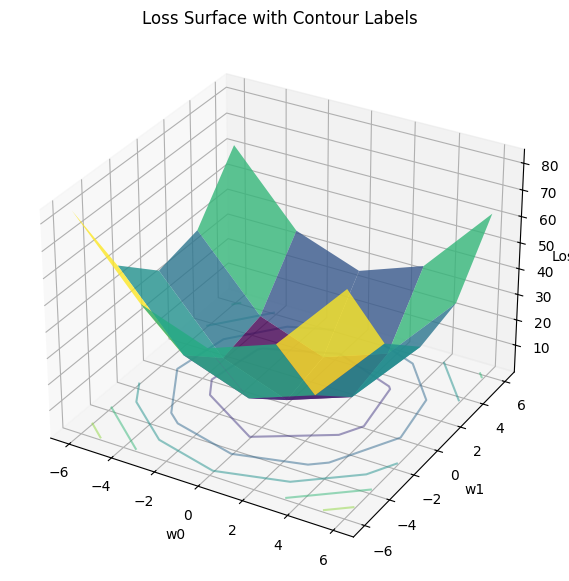

In [465]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()

## Gradient Descend

In [466]:
X = df['Radio'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Sales'].values

In [467]:
epochs = 100
alpha = 0.2
batch_size = 3
w = np.random.uniform(4, 6, size=(2,))
w

array([5.13934269, 5.55881073])

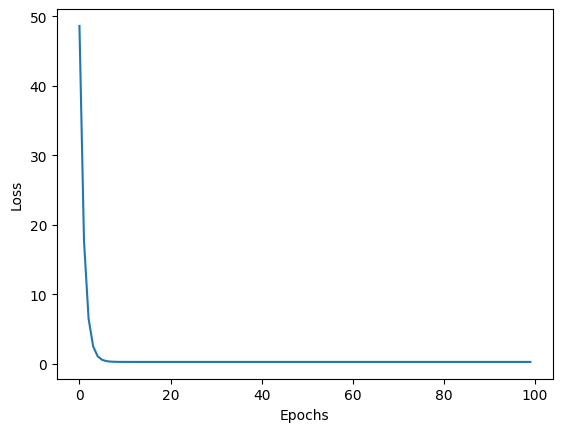

In [468]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, w, alpha, epochs):
    lossess = np.array([])
    w_collect = w.reshape(1, -1)

    for epoch in range(epochs):
        # Training loop

        #Calculate z
        y_hat = linear_function(X_train, w)

        #Calculate loss
        loss = calculate_loss(y_train, y_hat)
        lossess = np.append(lossess, loss)
        
        #Calculate gradient
        dldw = calculate_gradient(X_train, y_train, y_hat)
        if epoch == 0:
            dldw_collect = dldw.reshape(1, -1)
        else:
            dldw_collect = np.vstack((dldw_collect, dldw.reshape(1, -1)))

        # Update w
        w = w - alpha * dldw

        if epoch != epochs - 1:
            w_collect = np.vstack((w_collect, w.reshape(1, -1)))

    return lossess, dldw_collect, w_collect

lossess, dldw_collect, w_collect = GD_mini_batch(X, y, w, alpha, epochs)
plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


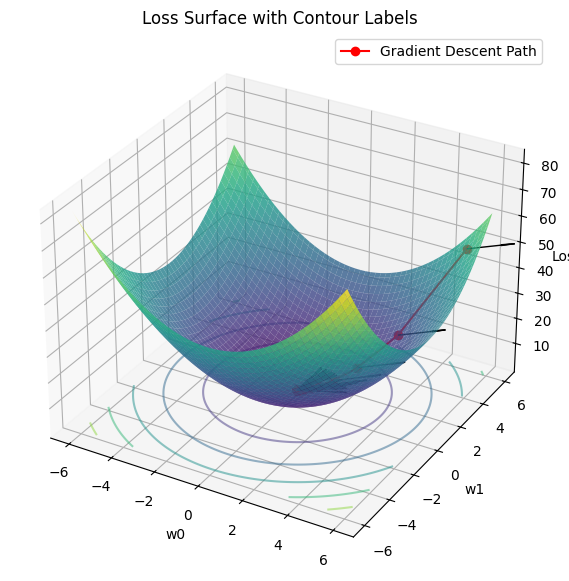

In [469]:
import numpy as np
import matplotlib.pyplot as plt

w0_range = np.linspace(-6, 6, 100)
w1_range = np.linspace(-6, 6, 100)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])
y_hat = linear_function(X, w0_w1)
loss = calculate_loss(y.reshape(-1, 1), y_hat)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Plot the gradient descent path
ax.plot(w_collect[:, 0], w_collect[:, 1], lossess, color='red', marker='o', label='Gradient Descent Path')

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient vectors to the 3D plot
ax.quiver(
    w_collect[:, 0], w_collect[:, 1], lossess,  # Starting points
    gradients[:, 0], gradients[:, 1], np.zeros_like(gradients[:, 0]),  # Gradient direction (no movement in loss axis)
    color='black', length=4, linewidth=1, arrow_length_ratio=0.3
)

ax.legend()

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()

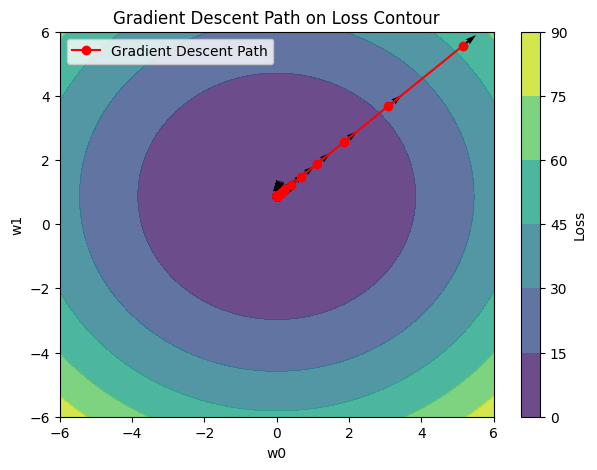

In [470]:
import numpy as np
import matplotlib.pyplot as plt

# Create the contour plot for loss surface
plt.figure(figsize=(7, 5))
contour = plt.contourf(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)
plt.colorbar(label="Loss")

# Plot the gradient descent path
plt.plot(w_collect[:, 0], w_collect[:, 1], color='red', marker='o', linestyle='-', label="Gradient Descent Path")

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient arrows
plt.quiver(
    w_collect[:-1, 0], w_collect[:-1, 1],  # Starting points
    gradients[:-1, 0], gradients[:-1, 1],  # Directions
    color='black', angles='xy', scale_units='xy', scale=1, width=0.005
)

# Labels and title
plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Gradient Descent Path on Loss Contour")
plt.legend()
plt.show()


# Binary cross entropy

## Dataset

In [522]:
data = pd.read_csv('Datasets/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [523]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [524]:
df = data[['GRE Score', 'Research']]
df = df.dropna()
scaler = StandardScaler()
df[['GRE Score']] = scaler.fit_transform(df[['GRE Score']])
df = pd.DataFrame(df, columns=['GRE Score', 'Research'])
df['GRE Score'] = df['GRE Score'] * (3/2)
df.head()


,GRE Score,Research
0,2.643160,1
1,0.941485,1
2,-0.105700,1
3,0.679688,1
4,-0.367496,0


## Loss Function

In [525]:
def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_binary_entropy(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid log(0)
    cost = - y_true * np.log(y_pred + epsilon) - (1 - y_true) * np.log(1 - y_pred + epsilon)
    loss = np.mean(cost, axis=0)
    return loss

def calculate_GD_binary_entropy(y, y_hat, X):
    derivative = np.dot(X.T, (y_hat - y)) / y.size
    return derivative

(400, 40000)
(400, 40000)
(40000,)
(200, 200)


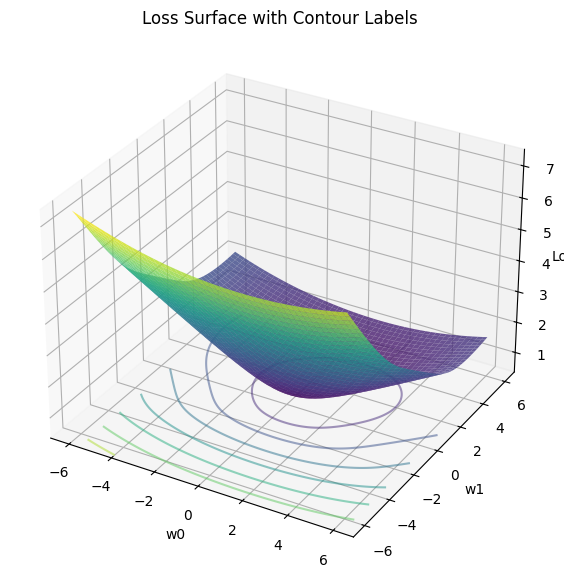

In [526]:
w0_range = np.linspace(-6, 6, 200)
w1_range = np.linspace(-6, 6, 200)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])

X = df['GRE Score'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Research'].values

z = calculate_z(X, w0_w1)
print(z.shape)
y_prob = calculate_sigmoid(z)
print(y_prob.shape)
loss = calculate_loss_binary_entropy(y.reshape(-1, 1), y_prob)
print(loss.shape)
loss_mesh = loss.reshape(w0_mesh.shape)
print(loss_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()


## Gradient Descend

In [527]:
X = df['GRE Score'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Research'].values

In [528]:
epochs = 1000
alpha = 1
w = np.array([-6,-6])

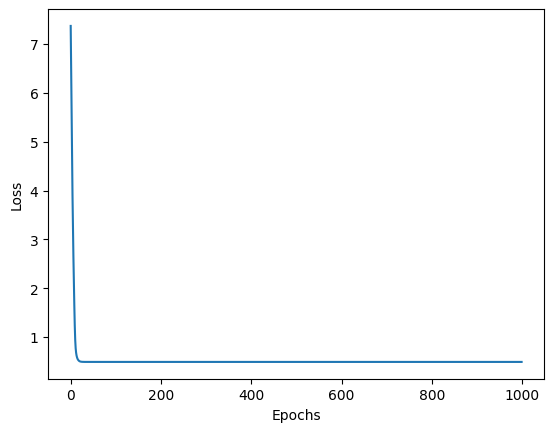

In [529]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, w, alpha, epochs):
    lossess = np.array([])
    w_collect = w.reshape(1, -1)

    for epoch in range(epochs):
        # Training loop

        #Calculate z
        z = calculate_z(X_train, w)
        y_prob = calculate_sigmoid(z)

        #Calculate loss
        loss = calculate_loss_binary_entropy(y_train, y_prob)
        lossess = np.append(lossess, loss)
        
        #Calculate gradient        
        dldw = calculate_GD_binary_entropy(y_train, y_prob, X_train)
        if epoch == 0:
            dldw_collect = dldw.reshape(1, -1)
        else:
            dldw_collect = np.vstack((dldw_collect, dldw.reshape(1, -1)))

        # Update w
        w = w - alpha * dldw

        if epoch != epochs - 1:
            w_collect = np.vstack((w_collect, w.reshape(1, -1)))

    return lossess, dldw_collect, w_collect

lossess, dldw_collect, w_collect = GD_mini_batch(X, y, w, alpha, epochs)
plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


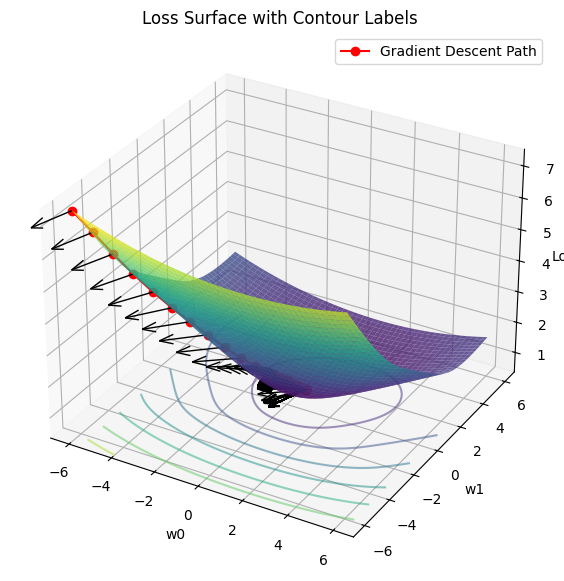

In [530]:
import numpy as np
import matplotlib.pyplot as plt

w0_range = np.linspace(-6, 6, 200)
w1_range = np.linspace(-6, 6, 200)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])

X = df['GRE Score'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Research'].values

z = calculate_z(X, w0_w1)
y_prob = calculate_sigmoid(z)
loss = calculate_loss_binary_entropy(y.reshape(-1, 1), y_prob)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Plot the gradient descent path
ax.plot(w_collect[:, 0], w_collect[:, 1], lossess, color='red', marker='o', label='Gradient Descent Path')

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient vectors to the 3D plot
ax.quiver(
    w_collect[:, 0], w_collect[:, 1], lossess,  # Starting points
    gradients[:, 0], gradients[:, 1], np.zeros_like(w_collect[:, 0]),  # Gradient direction (no movement in loss axis)
    color='black', length=4, linewidth=1, arrow_length_ratio=0.3
)

ax.legend()

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()

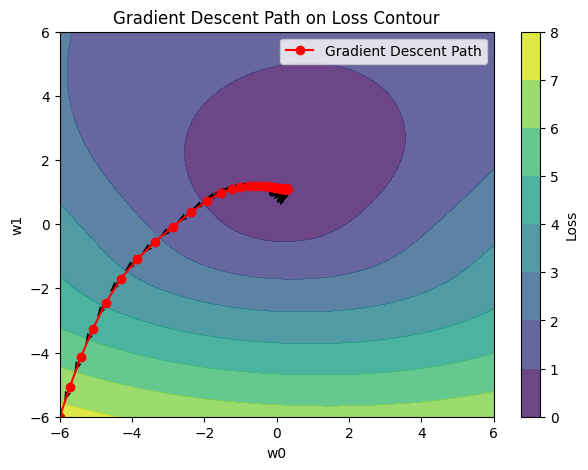

In [531]:
import numpy as np
import matplotlib.pyplot as plt

# Create the contour plot for loss surface
plt.figure(figsize=(7, 5))
contour = plt.contourf(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)
plt.colorbar(label="Loss")

# Plot the gradient descent path
plt.plot(w_collect[:, 0], w_collect[:, 1], color='red', marker='o', linestyle='-', label="Gradient Descent Path")

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient arrows
plt.quiver(
    w_collect[:-1, 0], w_collect[:-1, 1],  # Starting points
    gradients[:-1, 0], gradients[:-1, 1],  # Directions
    color='black', angles='xy', scale_units='xy', scale=1, width=0.005
)

# Labels and title
plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Gradient Descent Path on Loss Contour")
plt.legend()
plt.show()


# Without normalization

## Cross entropy loss

In [506]:
data = pd.read_csv('Datasets/Admission_Predict.csv')
df = data[['GRE Score', 'Research']]
df = df.dropna()

# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply normalization
df['GRE Score'] = scaler.fit_transform(df[['GRE Score']])

df = pd.DataFrame(df, columns=['GRE Score', 'Research'])
df['GRE Score'] = df['GRE Score'] * 6
df.head()

,GRE Score,Research
0,10.572640,1
1,3.765938,1
2,-0.422801,1
3,2.718754,1
4,-1.469986,0


In [507]:
def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_binary_entropy(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid log(0)
    cost = - y_true * np.log(y_pred + epsilon) - (1 - y_true) * np.log(1 - y_pred + epsilon)
    loss = np.mean(cost, axis=0)
    return loss

def calculate_GD_binary_entropy(y, y_hat, X):
    derivative = np.dot(X.T, (y_hat - y)) / y.size
    return derivative

Text(0.5, 0.92, 'Loss Surface with Contour Labels')

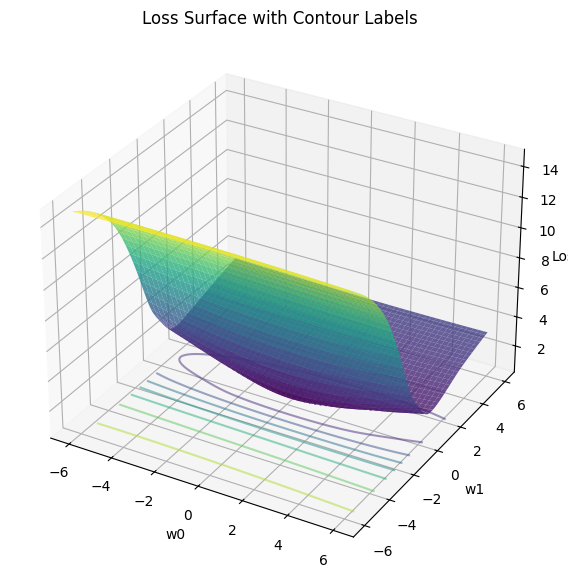

In [508]:
w0_range = np.linspace(-6, 6, 200)
w1_range = np.linspace(-6, 6, 200)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])

X = df['GRE Score'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Research'].values

z = calculate_z(X, w0_w1)
y_prob = calculate_sigmoid(z)
loss = calculate_loss_binary_entropy(y.reshape(-1, 1), y_prob)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

In [509]:
X = df['GRE Score'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Research'].values
X.shape, y.shape

((400, 2), (400,))

In [518]:
epochs = 100
alpha = 1
w = np.array([-6,-6])

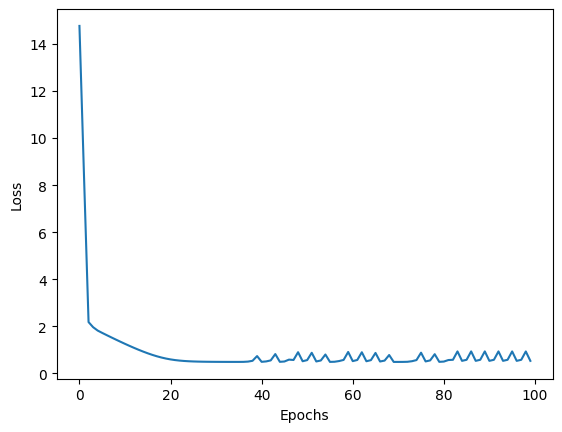

In [519]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, w, alpha, epochs):
    lossess = np.array([])
    w_collect = w.reshape(1, -1)

    for epoch in range(epochs):
        # Training loop

        #Calculate z
        z = calculate_z(X_train, w)
        y_prob = calculate_sigmoid(z)

        #Calculate loss
        loss = calculate_loss_binary_entropy(y_train, y_prob)
        lossess = np.append(lossess, loss)
        
        #Calculate gradient        
        dldw = calculate_GD_binary_entropy(y_train, y_prob, X_train)
        if epoch == 0:
            dldw_collect = dldw.reshape(1, -1)
        else:
            dldw_collect = np.vstack((dldw_collect, dldw.reshape(1, -1)))

        # Update w
        w = w - alpha * dldw

        if epoch != epochs - 1:
            w_collect = np.vstack((w_collect, w.reshape(1, -1)))

    return lossess, dldw_collect, w_collect

lossess, dldw_collect, w_collect = GD_mini_batch(X, y, w, alpha, epochs)
plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


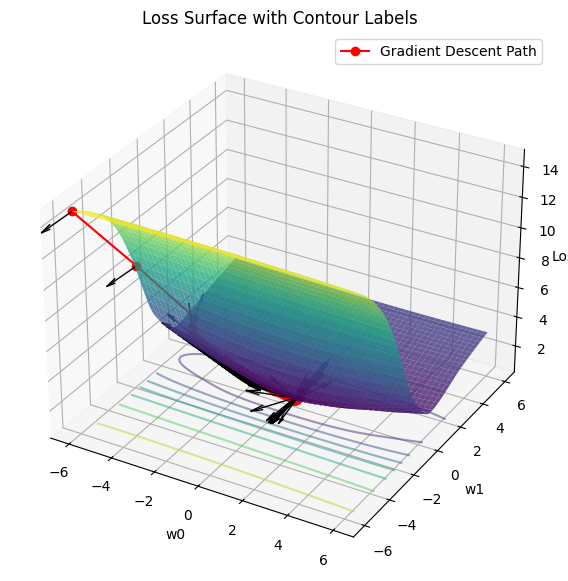

In [520]:
import numpy as np
import matplotlib.pyplot as plt

w0_range = np.linspace(-6, 6, 200)
w1_range = np.linspace(-6, 6, 200)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])

X = df['GRE Score'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Research'].values

z = calculate_z(X, w0_w1)
y_prob = calculate_sigmoid(z)
loss = calculate_loss_binary_entropy(y.reshape(-1, 1), y_prob)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Plot the gradient descent path
ax.plot(w_collect[:, 0], w_collect[:, 1], lossess, color='red', marker='o', label='Gradient Descent Path')

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient vectors to the 3D plot
ax.quiver(
    w_collect[:, 0], w_collect[:, 1], lossess,  # Starting points
    gradients[:, 0], gradients[:, 1], np.zeros_like(w_collect[:, 0]),  # Gradient direction (no movement in loss axis)
    color='black', length=4, linewidth=1, arrow_length_ratio=0.3
)

ax.legend()

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()

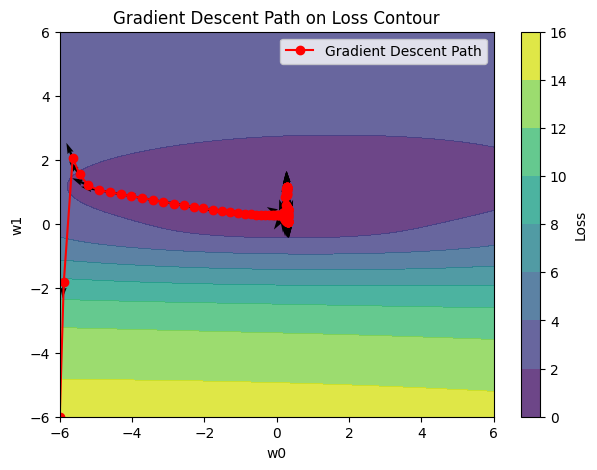

In [521]:
import numpy as np
import matplotlib.pyplot as plt

# Create the contour plot for loss surface
plt.figure(figsize=(7, 5))
contour = plt.contourf(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)
plt.colorbar(label="Loss")

# Plot the gradient descent path
plt.plot(w_collect[:, 0], w_collect[:, 1], color='red', marker='o', linestyle='-', label="Gradient Descent Path")

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient arrows
plt.quiver(
    w_collect[:-1, 0], w_collect[:-1, 1],  # Starting points
    gradients[:-1, 0], gradients[:-1, 1],  # Directions
    color='black', angles='xy', scale_units='xy', scale=1, width=0.005
)

# Labels and title
plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Gradient Descent Path on Loss Contour")
plt.legend()
plt.show()


## MSE

In [424]:
data = pd.read_csv('Datasets/marketing_sales_data.csv')
df = data.dropna()
df = df[['Radio', 'Sales']]
# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply normalization
df = scaler.fit_transform(df)

df = pd.DataFrame(df, columns=['Radio', 'Sales'])
df['Radio'] = df['Radio'] *2
# df['Sales'] = df['Sales'] *7

df.head()

,Radio,Sales
0,-3.615561,-1.145752
1,-0.757303,0.324483
2,-1.709096,-1.004803
3,1.640526,1.493444
4,3.806794,1.754587


In [425]:
def linear_function(x, w):
    """Calculate y_hat using a linear function."""
    t = np.dot(x, w)
    y_hat = t
    return y_hat

def calculate_loss(y, y_hat):
    """Calculate loss function."""
    cost = (y - y_hat)**2
    loss = np.mean(cost, axis = 0)
    return loss

def calculate_gradient(X, y, y_hat):
    """Calculate gradients."""
    dLdw = -2 * np.dot(X.T, (y - y_hat)) / y.shape[0]
    return dLdw

Text(0.5, 0.92, 'Loss Surface with Contour Labels')

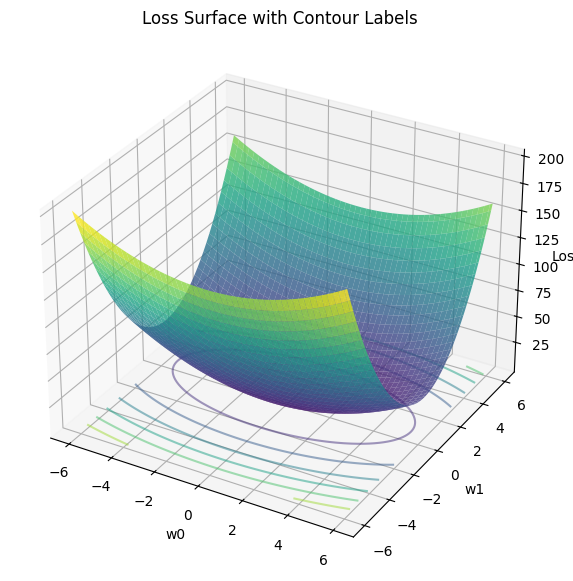

In [426]:
w0_range = np.linspace(-6, 6, 100)
w1_range = np.linspace(-6, 6, 100)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

X = df['Radio'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Sales'].values

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])
y_hat = linear_function(X, w0_w1)
loss = calculate_loss(y.reshape(-1, 1), y_hat)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

In [432]:
X = df['Radio'].values
X = np.c_[np.ones(X.shape[0]), X]
y = df['Sales'].values

In [449]:
epochs = 150
alpha = 0.2
batch_size = 3
w = np.random.uniform(4, 6, size=(2,))
w

array([5.68591901, 4.46063475])

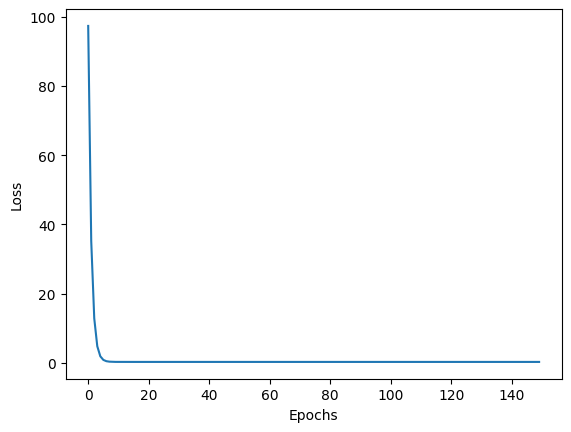

In [450]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, w, alpha, epochs):
    lossess = np.array([])
    w_collect = w.reshape(1, -1)

    for epoch in range(epochs):
        # Training loop

        #Calculate z
        y_hat = linear_function(X_train, w)

        #Calculate loss
        loss = calculate_loss(y_train, y_hat)
        lossess = np.append(lossess, loss)
        
        #Calculate gradient
        dldw = calculate_gradient(X_train, y_train, y_hat)
        if epoch == 0:
            dldw_collect = dldw.reshape(1, -1)
        else:
            dldw_collect = np.vstack((dldw_collect, dldw.reshape(1, -1)))

        # Update w
        w = w - alpha * dldw

        if epoch != epochs - 1:
            w_collect = np.vstack((w_collect, w.reshape(1, -1)))

    return lossess, dldw_collect, w_collect

lossess, dldw_collect, w_collect = GD_mini_batch(X, y, w, alpha, epochs)
plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


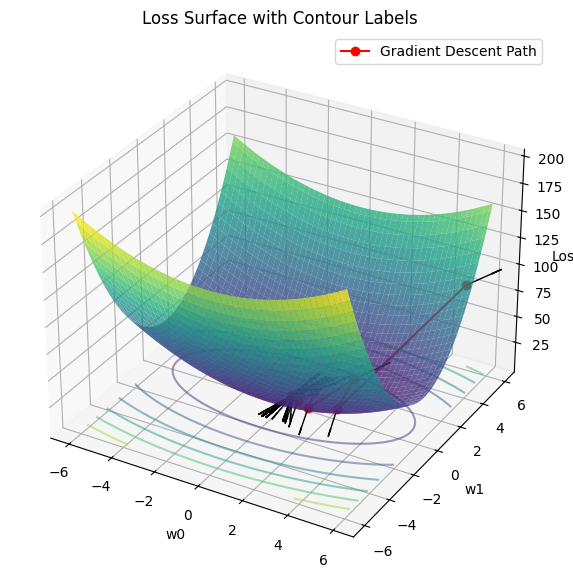

In [451]:
import numpy as np
import matplotlib.pyplot as plt

w0_range = np.linspace(-6, 6, 100)
w1_range = np.linspace(-6, 6, 100)
w0_mesh, w1_mesh = np.meshgrid(w0_range, w1_range)

w0_w1 = np.array([w0_mesh.ravel(), w1_mesh.ravel()])
y_hat = linear_function(X, w0_w1)
loss = calculate_loss(y.reshape(-1, 1), y_hat)
loss_mesh = loss.reshape(w0_mesh.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(18, 7))

# Plot the surface
ax.plot_surface(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)

# Create 2D contour plot
contour = ax.contour(w0_mesh, w1_mesh, loss_mesh, zdir='z', offset=0, cmap='viridis', alpha=0.5)

# Plot the gradient descent path
ax.plot(w_collect[:, 0], w_collect[:, 1], lossess, color='red', marker='o', label='Gradient Descent Path')

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient vectors to the 3D plot
ax.quiver(
    w_collect[:, 0], w_collect[:, 1], lossess,  # Starting points
    gradients[:, 0], gradients[:, 1], np.zeros_like(gradients[:, 0]),  # Gradient direction (no movement in loss axis)
    color='black', length=4, linewidth=1, arrow_length_ratio=0.3
)

ax.legend()

# Set labels for all axes
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss', labelpad=0.02)
ax.set_title('Loss Surface with Contour Labels')

plt.show()

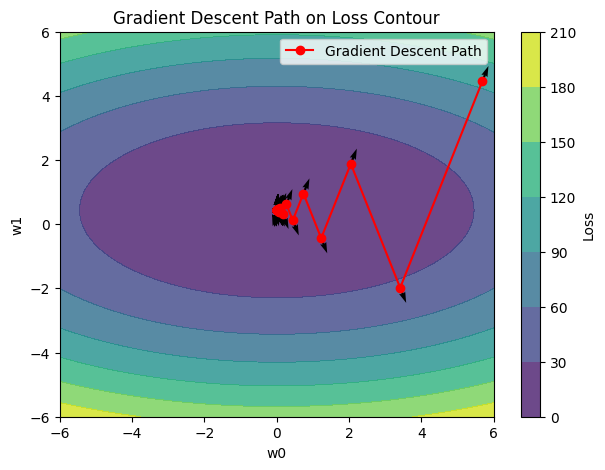

In [452]:
import numpy as np
import matplotlib.pyplot as plt

# Create the contour plot for loss surface
plt.figure(figsize=(7, 5))
contour = plt.contourf(w0_mesh, w1_mesh, loss_mesh, cmap='viridis', alpha=0.8)
plt.colorbar(label="Loss")

# Plot the gradient descent path
plt.plot(w_collect[:, 0], w_collect[:, 1], color='red', marker='o', linestyle='-', label="Gradient Descent Path")

# Normalize the gradient for better visualization
scale_factor = 0.5  # Adjust this to control arrow size
gradients = scale_factor * dldw_collect / np.linalg.norm(dldw_collect, axis=1, keepdims=True)

# Add gradient arrows
plt.quiver(
    w_collect[:-1, 0], w_collect[:-1, 1],  # Starting points
    gradients[:-1, 0], gradients[:-1, 1],  # Directions
    color='black', angles='xy', scale_units='xy', scale=1, width=0.005
)

# Labels and title
plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Gradient Descent Path on Loss Contour")
plt.legend()
plt.show()
